# Analysis 2

## Examine the growth of reviews by year, and see if there are any trends.

In [1]:
# Import modules needed
import numpy as np
import pandas as pd
import os
from sklearn import linear_model
import seaborn as sns
sns.set(style='white',color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

# Path to the data directory into which the cleaned data is saved.
csv_file_path = os.path.join("..", "data", "cleaned_data", "movie_reviews.csv")
if not os.path.exists(csv_file_path):
    print("{} doesn't exist - perhaps the data cleaning script needs to be run?".format(csv_file_path))

In [2]:
# read 'movie_reviews.csv' into a dataframe
review_df = pd.read_csv(csv_file_path, quoting=2, parse_dates=True, infer_datetime_format=True, encoding="UTF-8")

# These don't get read back properly as dates :(
review_df['publication_date'] = pd.to_datetime(review_df['publication_date'])
review_df['date_updated'] = pd.to_datetime(review_df['date_updated'])

# explore tha dataframe and see how it looks
print(review_df.shape)
print(review_df.info())
print(review_df.head())

(26893, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26893 entries, 0 to 26892
Data columns (total 12 columns):
byline              26893 non-null object
critics_pick        26893 non-null bool
date_updated        26878 non-null datetime64[ns]
display_title       26893 non-null object
headline            26893 non-null object
mpaa_rating         26893 non-null object
opening_date        16971 non-null object
publication_date    26893 non-null datetime64[ns]
summary_short       20764 non-null object
movie_year          26893 non-null float64
movie_month         26893 non-null float64
movie_month_name    26893 non-null object
dtypes: bool(1), datetime64[ns](2), float64(2), object(7)
memory usage: 2.3+ MB
None
                byline critics_pick        date_updated  \
0       Manohla Dargis         True 2017-04-18 16:44:22   
1            A O Scott         True 2017-04-18 16:44:21   
2            A O Scott         True 2017-04-18 16:44:21   
3  Jeannette Catsoulis        False 20

### Create a data frame containing the year and the number of movie reviews published.

In [3]:
# create a list to hold the years
year_list = []

for y in review_df['movie_year'].unique():
    count = len(review_df[review_df['movie_year'] == y]['movie_year'])    
    year_list.append({'year':int(y), 'count':count})
    
reviews_by_year = pd.DataFrame.from_records(year_list, columns=['year', 'count'])
reviews_by_year.sort_values('year', axis=0, ascending=True, inplace=True)
reviews_by_year = reviews_by_year.reset_index(drop=True)

# Drop 2017, since it isn't a complete year.
reviews_by_year = reviews_by_year[reviews_by_year['year'] != 2017]

# Drop 2005, since having 10 reviews is suspicious (2004 had 278, 2006 had 419).
reviews_by_year = reviews_by_year[reviews_by_year['year'] != 2005]

print(reviews_by_year.head())
print(reviews_by_year.tail(20))

   year  count
0  1915      1
1  1916      1
2  1917      1
3  1921      1
4  1923      2
    year  count
77  1996    370
78  1997    411
79  1998    427
80  1999    400
81  2000    432
82  2001    412
83  2002    465
84  2003    420
85  2004    278
87  2006    419
88  2007    605
89  2008    604
90  2009    581
91  2010    575
92  2011    700
93  2012    691
94  2013    812
95  2014    886
96  2015    783
97  2016    771


In [4]:
#Function to create output data folder to store graph and .csv 
def create_directory_for_output():
    current_dir = os.path.dirname('__file__')
    data_folder = os.path.join(current_dir, 'ana_2')
    if not os.path.exists(data_folder):
        os.mkdir(data_folder)
    return data_folder

output_folder=create_directory_for_output()

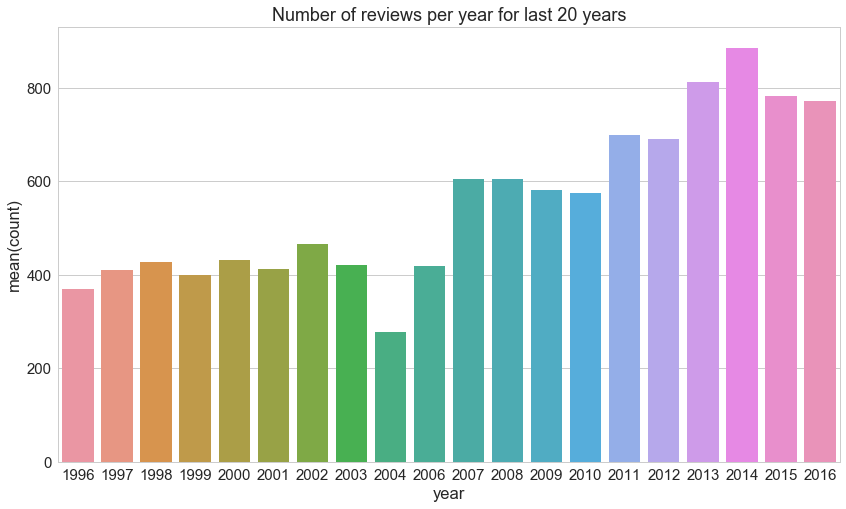

In [6]:
# plot barplot graph using seaborn for Number of reviews per year for last 20 years
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.barplot(x="year", y="count",data=reviews_by_year.tail(20));
plt.title('Number of reviews per year for last 20 years')
sns.set(font_scale=1.5)
plt.show()

# save the plot to output folder
plot_name = 'number_of_reviews_per_year_for_last_20years'
plot_path = os.path.join(output_folder, plot_name)
plot_path+='.png'
ax.figure.savefig(plot_path,bbox_inches='tight')

In [9]:
#csv file name and path
file_name = 'Number_of_reviews_per_year'
file_path = os.path.join(output_folder, file_name)
file_path+='.csv'

#Save file to created output file
reviews_by_year.to_csv(file_path,index = False)

## Linear Regression model to understand trends for number of reviews per year

Coefficients: 
 [ 4.90834732]
Variance score: 0.58


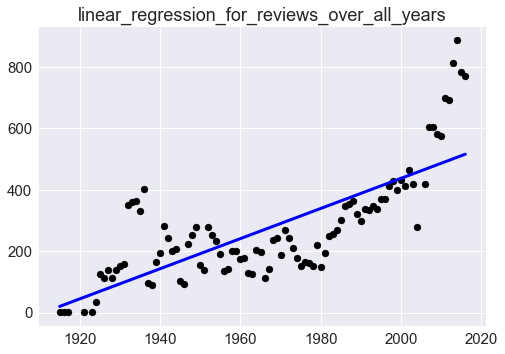

In [13]:
# check linear regression model to understand trends og number of reviews per year
x_data = reviews_by_year['year'].values.reshape(-1, 1)
y_data = reviews_by_year['count']

regr = linear_model.LinearRegression()
fit = regr.fit(x_data, y_data)

# The coefficients.
print('Coefficients: \n', regr.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_data, y_data))

# Plot outputs
plt.title('linear_regression_for_reviews_over_all_years')
ax=plt.scatter(x_data, y_data, color='black')
plt.plot(x_data, regr.predict(x_data), color='blue', linewidth=3)

# show the plot
plt.show()

# save the plot to output folder
plot_name = 'linear_regression_for_reviews_over_all_years'
plot_path = os.path.join(output_folder, plot_name)
plot_path+='.png'
ax.figure.savefig(plot_path,bbox_inches='tight')

Looks like an exponential might fit better...

### Let's see about fitting a line to the 2000s, since those points look linear.

Coefficients: 
 [ 30.28360784]
Variance score: 0.80


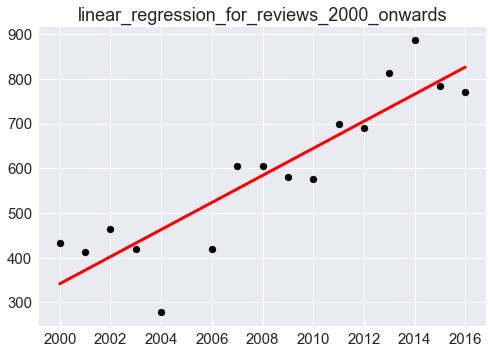

In [18]:
# Only consider reviews for year greater than or equal to 2000
recent_reviews = reviews_by_year[reviews_by_year['year'] >= 2000]


x_data = recent_reviews['year'].values.reshape(-1, 1)
y_data = recent_reviews['count']

# Applying linear regression
regr = linear_model.LinearRegression()
fit = regr.fit(x_data, y_data)

# The coefficients.
print('Coefficients: \n', regr.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_data, y_data))

# Plot outputs.
plt.title('linear_regression_for_reviews_2000_onwards')
ax=plt.scatter(x_data, y_data, color='black')
plt.plot(x_data, regr.predict(x_data), color='red', linewidth=3)
plt.show()

# save the plot to output folder
plot_name = 'linear_regression_for_reviews_2000_onwards'
plot_path = os.path.join(output_folder, plot_name)
plot_path+='.png'
ax.figure.savefig(plot_path,bbox_inches='tight')

## Observations:

* There is no linear increament or decreament in number of reviews over the years. 
* linear regression model for number of reviews over all years shows that :
  -  Coefficients: [ 4.90834732]
  -  Variance score: 0.58
  It means review count has no increamental growth over the years so model is perfect only approx. 58%

* But, linear regression model for number of reviews after year 2000 onwards shows near about linear increament in no.of reviews 
  - Coefficients: [ 30.28360784]
  - Variance score: 0.80
  It means review count has somewhat linear increamental growth after year 2000 onwards so model is perfect only approx. 80%